In [1]:
import numpy as np
import matplotlib.pyplot as plt
from shapes import RawShape, shape_from_points, generate_from_arc_line
import meshlib.mrmeshpy as mr
from meshlib.mrmeshpy import SubdivideSettings
import meshlib.mrmeshnumpy as mrn

In [2]:
r = 1
delta_arc = 0.25
delta_theta = delta_arc/r
thetas = np.linspace(0,np.pi,int(np.pi/delta_theta))
x = r * np.cos(thetas)
y = r * np.sin(thetas)
semi_circle = RawShape(x,y)

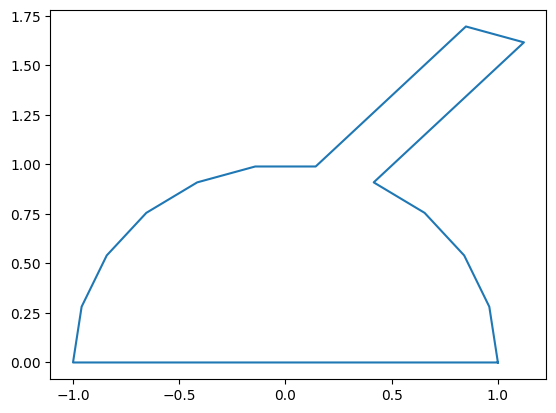

In [3]:
theta1 = np.pi/3
theta2 = theta1 + np.arcsin(0.5)

rect1 = generate_from_arc_line(theta2,1, 1,thetas, r)
reversed(rect1)

line = generate_from_arc_line(theta1,1, 1,thetas, r) + rect1 + semi_circle
line.close()

plt.plot(line.x,line.y)

C:\Users\OM-FI\AppData\Local\Temp\ipykernel_38128\3482578704.py:5: DeprecationWarning: mrmeshpy.Path is deprecated, use os.PathLike type instead
  mr.saveMesh(line3.generate_mesh(), mr.Path("with hole.obj"))


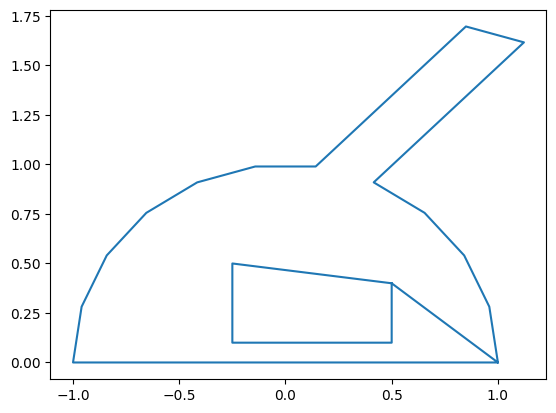

In [8]:
line2 = shape_from_points([-0.25,-0.25,0.5,0.5],[0.1,0.5,0.4,0.1])
line2.close()
line3 = line + line2
plt.plot(line3.x,line3.y)
mr.saveMesh(line3.generate_mesh(), mr.Path("with hole.obj"))

In [9]:
line3.x

array([ 1.        ,  0.95949297,  0.84125353,  0.65486073,  0.41541501,
        1.12252179,  0.84942162,  0.14231484,  0.14231484, -0.14231484,
       -0.41541501, -0.65486073, -0.84125353, -0.95949297, -1.        ,
        1.        ,  0.5       ,  0.5       , -0.25      , -0.25      ,
        0.5       ,  0.5       ])

In [5]:
points3 = line.to_point_list()
polyline2 = mrn.polyline2FromPoints(points3)

# compute the triangulation inside the contour
mesh = mr.triangulateContours(polyline2.contours2(None))
# save 2D triangulation in a textual OBJ file:
mr.saveMesh(mesh, mr.Path("before refining.obj"))

sub_set = SubdivideSettings()
sub_set.__setattr__("maxEdgeSplits",20)

print(sub_set.maxEdgeSplits)
# by default split 1000 edges:
mr.subdivideMesh(mesh, sub_set)
# save 2D mesh in a textual OBJ file:
mr.saveMesh(mesh, mr.Path("after refining.obj"))

20


C:\Users\OM-FI\AppData\Local\Temp\ipykernel_38128\3922846044.py:7: DeprecationWarning: mrmeshpy.Path is deprecated, use os.PathLike type instead
  mr.saveMesh(mesh, mr.Path("before refining.obj"))
C:\Users\OM-FI\AppData\Local\Temp\ipykernel_38128\3922846044.py:16: DeprecationWarning: mrmeshpy.Path is deprecated, use os.PathLike type instead
  mr.saveMesh(mesh, mr.Path("after refining.obj"))


In [6]:
points3 = line.to_point_list()
polyline2 = mrn.polyline2FromPoints(points3)

# compute the triangulation inside the contour
mesh = mr.triangulateContours(polyline2.contours2(None))
# save 2D triangulation in a textual OBJ file:
mr.saveMesh(mesh, mr.Path("before refining.obj"))

sub_set = SubdivideSettings()
sub_set.__setattr__("maxEdgeSplits",20)

print(sub_set.maxEdgeSplits)
# by default split 1000 edges:
mr.subdivideMesh(mesh, sub_set)
# save 2D mesh in a textual OBJ file:
mr.saveMesh(mesh, mr.Path("after refining.obj"))

20


C:\Users\OM-FI\AppData\Local\Temp\ipykernel_38128\3922846044.py:7: DeprecationWarning: mrmeshpy.Path is deprecated, use os.PathLike type instead
  mr.saveMesh(mesh, mr.Path("before refining.obj"))
C:\Users\OM-FI\AppData\Local\Temp\ipykernel_38128\3922846044.py:16: DeprecationWarning: mrmeshpy.Path is deprecated, use os.PathLike type instead
  mr.saveMesh(mesh, mr.Path("after refining.obj"))


In [7]:
import meshlib.mrmeshpy as mr
from meshlib.mrmeshpy import SubdivideSettings
# load raster image:
dm = mr.loadDistanceMapFromImage(mr.Path("Binary_coins.png"), 0)
# find the boundary contour between black and white:

polyline2 = mr.distanceMapTo2DIsoPolyline(dm, isoValue=127)
# compute the triangulation inside the contour
mesh = mr.triangulateContours(polyline2.contours2(None))
# save 2D triangulation in a textual OBJ file:
mr.saveMesh(mesh, mr.Path("Binary_coins.obj"))


sub_set = SubdivideSettings()
sub_set.__setattr__("maxTriAspectRatio",0.25)
sub_set.maxTriAspectRatio
print(sub_set.maxEdgeLen)
# by default split 1000 edges:
mr.subdivideMesh(mesh, sub_set)
# save 2D mesh in a textual OBJ file:
mr.saveMesh(mesh, mr.Path("Binary_coins1.obj"))

0.0


C:\Users\OM-FI\AppData\Local\Temp\ipykernel_38128\495985157.py:4: DeprecationWarning: mrmeshpy.Path is deprecated, use os.PathLike type instead
  dm = mr.loadDistanceMapFromImage(mr.Path("Binary_coins.png"), 0)
C:\Users\OM-FI\AppData\Local\Temp\ipykernel_38128\495985157.py:11: DeprecationWarning: mrmeshpy.Path is deprecated, use os.PathLike type instead
  mr.saveMesh(mesh, mr.Path("Binary_coins.obj"))
C:\Users\OM-FI\AppData\Local\Temp\ipykernel_38128\495985157.py:21: DeprecationWarning: mrmeshpy.Path is deprecated, use os.PathLike type instead
  mr.saveMesh(mesh, mr.Path("Binary_coins1.obj"))
